# Text-guided image-inpainting

In [ ]:
!pip install diffusers transformers ftfy accelerate

import PIL
import torch
from io import BytesIO
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Create your mask here: https://huggingface.co/docs/diffusers/using-diffusers/inpaint#create-a-mask-image

(-0.5, 4499.5, 3374.5, -0.5)

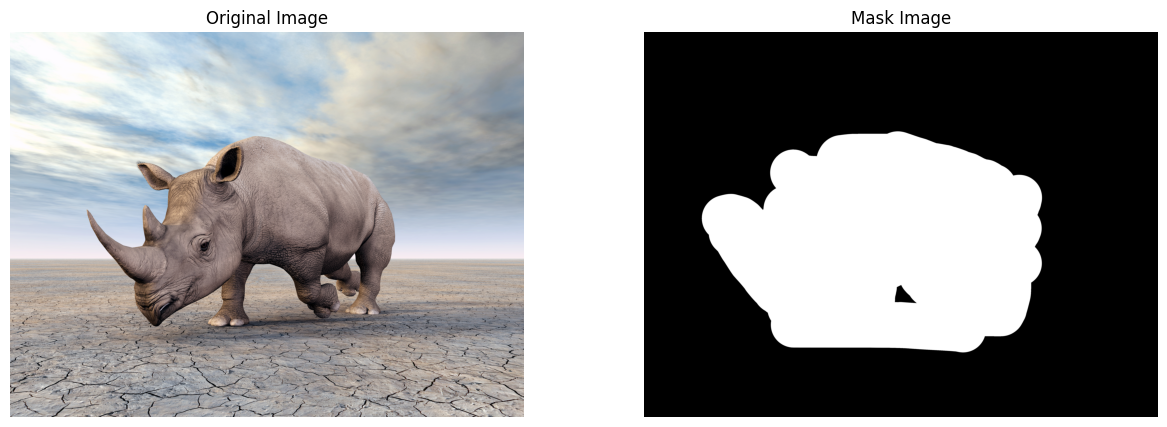

In [ ]:
init_image =  load_image("/content/Rhinoceros_LIL_53344.jpeg")
mask_image =  load_image("/content/Rhinoceros_LIL_53344_mask.png")

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

Now you can create a prompt to replace the mask with something else:

  0%|          | 0/50 [00:00<?, ?it/s]

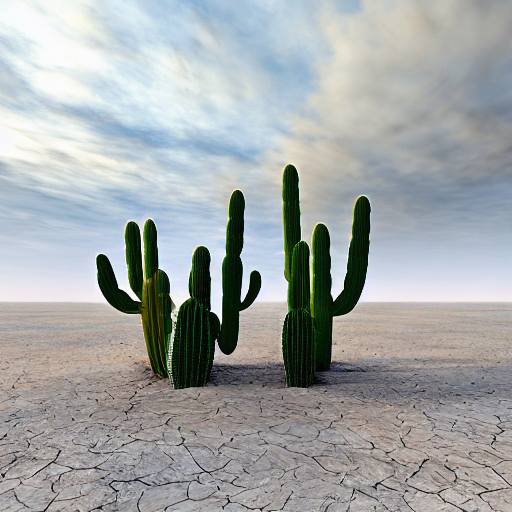

In [ ]:
prompt = "cactus in the desert, realistic"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

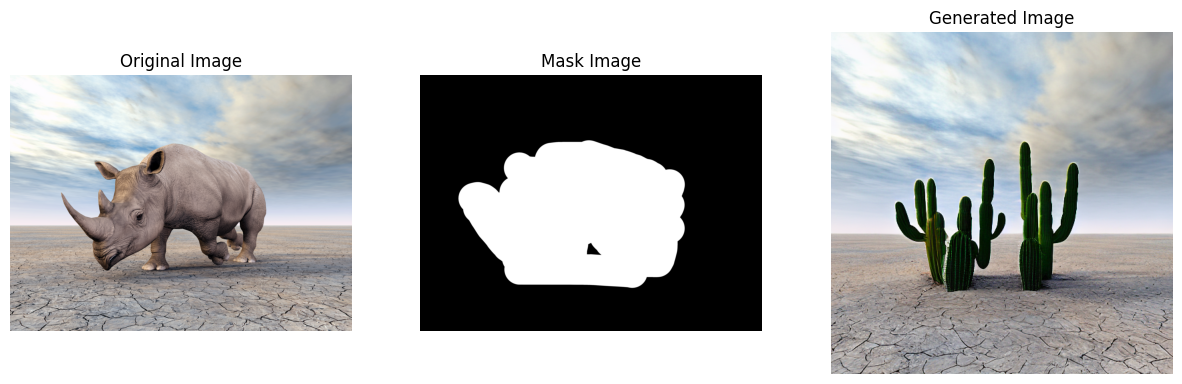

In [ ]:


# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Generated Image')
axes[2].axis('off')

plt.show()

In [ ]:
#